In [2]:
from skimage.metrics import structural_similarity
import argparse
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

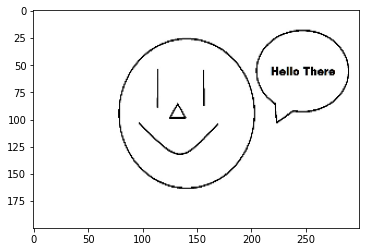

In [28]:
image_orig = cv2.imread("images/image2.jpg")
image_mod = cv2.imread("images/image3.jpg")

resized_orig = cv2.resize(image_orig, (300, 200))    
resized_mod = cv2.resize(image_mod, (300, 200))

plt.imshow(resized_orig)
plt.imshow(resized_mod)

In [23]:
gray_orig = cv2.cvtColor(resized_orig, cv2.COLOR_BGR2GRAY)
gray_mod = cv2.cvtColor(resized_mod, cv2.COLOR_BGR2GRAY)

In [24]:
(score, diff) = structural_similarity(gray_orig, gray_mod, full=True)
diff = (diff * 255).astype("uint8")
print("Structural Similarity Index: {}".format(score))

Structural Similarity Index: 0.9429132920093614


In [25]:
thresh = cv2.threshold(diff, 0, 25, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

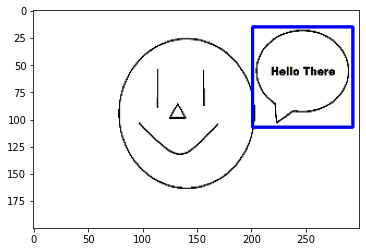

In [26]:
for c in cnts:
# compute the bounding box of the contour and then draw the
# bounding box on both input images to represent where the two
# images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(resized_orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(resized_mod, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
# show the output images
plt.imshow(resized_orig)
plt.imshow(resized_mod)

In [14]:
cmap = plt.cm.jet
norm = plt.Normalize(vmin=resized_mod.min(), vmax=resized_mod.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = norm(resized_mod)

In [29]:
plt.imsave('temp/test1stver.jpg', resized_orig)

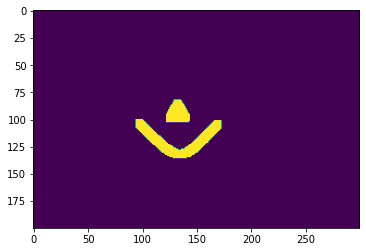

In [20]:
plt.imshow(thresh)

In [ ]:
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)